In [2]:
import pandas as pd
import numpy as np

In [1]:
import json


## WILDTRACK ReadMe

This is the Wildtrack dataset.

Annotations:
Frame annotations are in the folder “annotations_positions”.
Corresponding images from 7 cameras are in the folder “Image_subsets”.

In order to recover the 3D location of the target, you have to use the following information.

The “positionID” in .json files are indexed on a 480x1440 grid, X-first, with a 2.5cm spacing. The origin is (-3.0,-9.0)
Therefore,

`X = -3.0 + 0.025*ID%480` \\
`Y = -9.0 + 0.025*ID/480`

The file “rectangles.pom” gives correspondence between rectangle IDs and 2D bounding boxes on each camera.

This files is needed to run algorithms such as
https://github.com/pierrebaque/DeepOcclusion

It can be reproduced using
https://github.com/pierrebaque/generatePOMfile

Camera calibrations:
You will find camera calibrations in the folder “calibrations”.
“extrinsic” contains extrinsic camera calibrations
“intrinsic_zero” contains intrinsic calibrations for the images which have been undistorted. These are the ones which should be used for the images provided in this dataset.
“intrinsic_original” contains calibrations for the original images and the original video, which we can provide if you ask.

If you use this dataset, please cite the paper:
“The WILDTRACK Multi-Camera Person Dataset.” T.Chavdarova et al.

https://arxiv.org/pdf/1707.09299.pdf

If you need more unlabelled data, please contact us.

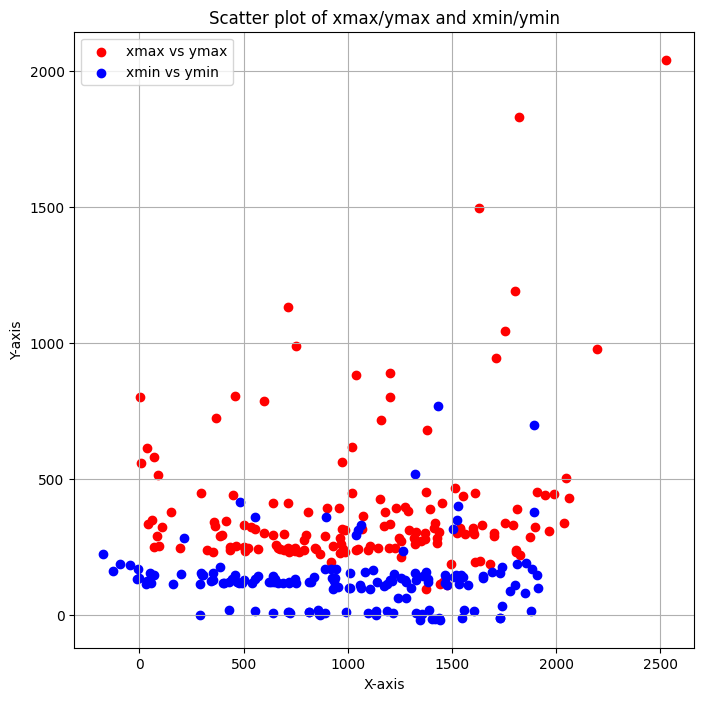

In [3]:
import json
import matplotlib.pyplot as plt


file_path = '/content/00000000.json'
with open(file_path, 'r') as f:
    data = json.load(f)

xmax_vals, xmin_vals, ymax_vals, ymin_vals = [], [], [], []

for person in data:
    for view in person["views"]:
        if view["xmax"] != -1 and view["xmin"] != -1 and view["ymax"] != -1 and view["ymin"] != -1:
            xmax_vals.append(view["xmax"])
            xmin_vals.append(view["xmin"])
            ymax_vals.append(view["ymax"])
            ymin_vals.append(view["ymin"])

plt.figure(figsize=(8, 8))
plt.scatter(xmax_vals, ymax_vals, label='xmax vs ymax', color='r')
plt.scatter(xmin_vals, ymin_vals, label='xmin vs ymin', color='b')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter plot of xmax/ymax and xmin/ymin')
plt.legend()
plt.grid(True)
plt.show()


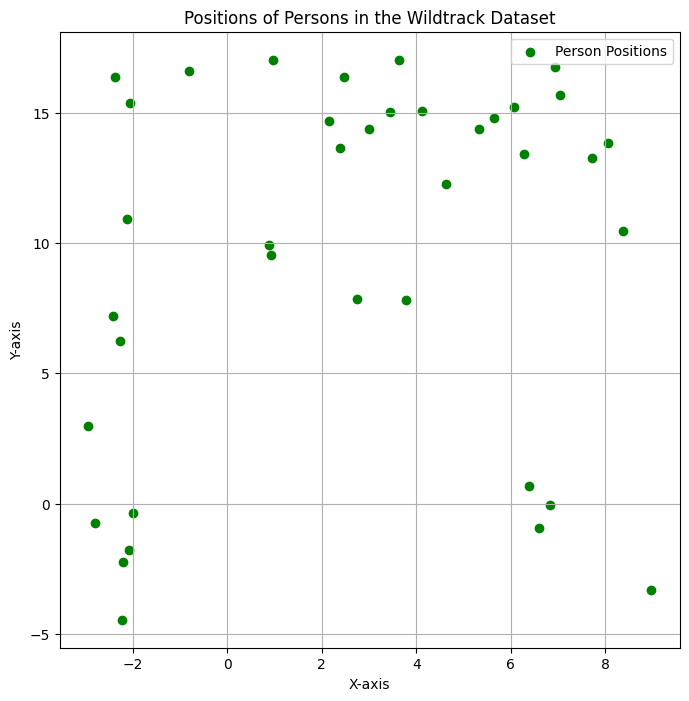

In [4]:
import matplotlib.pyplot as plt

def convert_position_id(positionID):
    X = -3.0 + 0.025 * (positionID % 480)
    Y = -9.0 + 0.025 * (positionID // 480)
    return X, Y

person_positions = []
for person in data:
    positionID = person['positionID']
    X, Y = convert_position_id(positionID)
    person_positions.append((X, Y))

x_vals = [pos[0] for pos in person_positions]
y_vals = [pos[1] for pos in person_positions]

plt.figure(figsize=(8, 8))
plt.scatter(x_vals, y_vals, label='Person Positions', color='g', marker='o')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Positions of Persons in the Wildtrack Dataset')
plt.grid(True)
plt.legend()
plt.show()


## Multiple Frames

In [5]:
!unzip annotations_positions.zip

Archive:  annotations_positions.zip
   creating: annotations_positions/
  inflating: annotations_positions/00000115.json  
  inflating: annotations_positions/00000545.json  
  inflating: annotations_positions/00000050.json  
  inflating: annotations_positions/00000400.json  
  inflating: annotations_positions/00001495.json  
  inflating: annotations_positions/00001180.json  
  inflating: annotations_positions/00001745.json  
  inflating: annotations_positions/00001315.json  
  inflating: annotations_positions/00001600.json  
  inflating: annotations_positions/00001250.json  
  inflating: annotations_positions/00001895.json  
  inflating: annotations_positions/00000800.json  
  inflating: annotations_positions/00000945.json  
  inflating: annotations_positions/00000695.json  
  inflating: annotations_positions/00000380.json  
  inflating: annotations_positions/00001440.json  
  inflating: annotations_positions/00001010.json  
  inflating: annotations_positions/00001505.json  
  inflatin

In [7]:
import os


file_list = os.listdir('/content/annotations_positions')
print(file_list)


['00000630.json', '00000440.json', '00001425.json', '00000300.json', '00001895.json', '00000020.json', '00000165.json', '00000720.json', '00001690.json', '00000705.json', '00001780.json', '00001380.json', '00001020.json', '00000675.json', '00000240.json', '00001440.json', '00001880.json', '00000125.json', '00001885.json', '00000830.json', '00000900.json', '00001705.json', '00001580.json', '00001685.json', '00000620.json', '00001225.json', '00000140.json', '00000210.json', '00000420.json', '00001775.json', '00001740.json', '00001660.json', '00001760.json', '00001035.json', '00001115.json', '00000505.json', '00000460.json', '00000995.json', '00001145.json', '00000410.json', '00000845.json', '00000840.json', '00001835.json', '00000085.json', '00001050.json', '00001310.json', '00000285.json', '00001805.json', '00000215.json', '00001395.json', '00000315.json', '00001090.json', '00001270.json', '00000750.json', '00001510.json', '00000590.json', '00000585.json', '00001065.json', '00000395.jso

In [8]:
file_list.sort()

In [9]:
print(file_list)

['00000000.json', '00000005.json', '00000010.json', '00000015.json', '00000020.json', '00000025.json', '00000030.json', '00000035.json', '00000040.json', '00000045.json', '00000050.json', '00000055.json', '00000060.json', '00000065.json', '00000070.json', '00000075.json', '00000080.json', '00000085.json', '00000090.json', '00000095.json', '00000100.json', '00000105.json', '00000110.json', '00000115.json', '00000120.json', '00000125.json', '00000130.json', '00000135.json', '00000140.json', '00000145.json', '00000150.json', '00000155.json', '00000160.json', '00000165.json', '00000170.json', '00000175.json', '00000180.json', '00000185.json', '00000190.json', '00000195.json', '00000200.json', '00000205.json', '00000210.json', '00000215.json', '00000220.json', '00000225.json', '00000230.json', '00000235.json', '00000240.json', '00000245.json', '00000250.json', '00000255.json', '00000260.json', '00000265.json', '00000270.json', '00000275.json', '00000280.json', '00000285.json', '00000290.jso

In [10]:
file_list = ['/content/annotations_positions/' + file for file in file_list]


In [11]:
!pip install ipywidgets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.6 MB/s eta 0:00:00


In [12]:
import matplotlib.pyplot as plt
import json
import ipywidgets as widgets
from IPython.display import display

# Function to convert positionID into (X, Y) coordinates
def convert_position_id(positionID):
    X = -3.0 + 0.025 * (positionID % 480)
    Y = -9.0 + 0.025 * (positionID // 480)
    return X, Y

# Function to load data and get person positions
def get_positions(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return [(convert_position_id(person['positionID'])) for person in data]

# Function to plot the data for a specific file
def plot_file(file_paths, idx):
    file_path = file_paths[idx]
    person_positions = get_positions(file_path)

    x_vals = [pos[0] for pos in person_positions]
    y_vals = [pos[1] for pos in person_positions]

    plt.figure(figsize=(8, 8))
    plt.scatter(x_vals, y_vals, color='g', marker='o')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title(f'Positions of Persons in File {file_path}')
    plt.grid(True)
    plt.show()

# List of file paths
file_paths = file_list

# Creating a slider widget
slider = widgets.IntSlider(value=0, min=0, max=len(file_paths)-1, step=1, description='File Index')

# Function to update plot when the slider value changes
def update_plot(idx):
    plt.close()  # Close the previous plot
    plot_file(file_paths, idx)

# Linking the slider to the update_plot function
widgets.interact(update_plot, idx=slider)

# Display the slider
display(slider)


interactive(children=(IntSlider(value=0, description='File Index', max=399), Output()), _dom_classes=('widget-…

IntSlider(value=0, description='File Index', max=399)

In [13]:
import matplotlib.pyplot as plt
import json
import ipywidgets as widgets
from IPython.display import display

# Function to convert positionID into (X, Y) coordinates
def convert_position_id(positionID):
    X = -3.0 + 0.025 * (positionID % 480)
    Y = -9.0 + 0.025 * (positionID // 480)
    return X, Y

# Function to load data and get person positions
def get_positions(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    # Return a list of tuples (personID, X, Y)
    return [(person['personID'], *convert_position_id(person['positionID'])) for person in data]

# Function to plot the data for a specific file with labels
def plot_file(file_paths, idx):
    file_path = file_paths[idx]
    person_positions = get_positions(file_path)

    x_vals = [pos[1] for pos in person_positions]  # Extracting X values
    y_vals = [pos[2] for pos in person_positions]  # Extracting Y values

    plt.figure(figsize=(8, 8))
    plt.scatter(x_vals, y_vals, color='g', marker='o')

    # Annotate each point with its personID
    for personID, x, y in person_positions:
        plt.text(x, y, str(personID), fontsize=9, ha='right')

    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title(f'Positions of Persons in File {file_path}')
    plt.grid(True)
    plt.show()

# List of file paths
file_paths = file_list

# Creating a slider widget
slider = widgets.IntSlider(value=0, min=0, max=len(file_paths)-1, step=1, description='File Index')

# Function to update plot when the slider value changes
def update_plot(idx):
    plt.close()  # Close the previous plot
    plot_file(file_paths, idx)

# Linking the slider to the update_plot function
widgets.interact(update_plot, idx=slider)

# Display the slider
display(slider)


interactive(children=(IntSlider(value=0, description='File Index', max=399), Output()), _dom_classes=('widget-…

IntSlider(value=0, description='File Index', max=399)

## Experimentation

### DBSCAN

In [14]:
import matplotlib.pyplot as plt
import json
import ipywidgets as widgets
from IPython.display import display
from sklearn.cluster import DBSCAN
import numpy as np

# Function to convert positionID into (X, Y) coordinates
def convert_position_id(positionID):
    X = -3.0 + 0.025 * (positionID % 480)
    Y = -9.0 + 0.025 * (positionID // 480)
    return X, Y

# Function to load data and get person positions
def get_positions(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    # Return a list of tuples (personID, X, Y)
    return [(person['personID'], *convert_position_id(person['positionID'])) for person in data]

# Function to plot the data for a specific file with DBSCAN clustering
def plot_file(file_paths, idx):
    file_path = file_paths[idx]
    person_positions = get_positions(file_path)

    # Extract X and Y values
    x_vals = np.array([pos[1] for pos in person_positions])  # X values
    y_vals = np.array([pos[2] for pos in person_positions])  # Y values
    coords = np.column_stack((x_vals, y_vals))  # Combine X and Y values into a 2D array

    # Apply DBSCAN clustering
    db = DBSCAN(eps=1.0, min_samples=3).fit(coords)  # Adjusted DBSCAN parameters
    labels = db.labels_  # Get cluster labels

    # Number of clusters
    unique_labels = set(labels)
    colors = plt.cm.get_cmap('tab20', len(unique_labels))  # Use a colormap for clusters

    plt.figure(figsize=(8, 8))

    # Plot clusters with color coding
    for label in unique_labels:
        cluster_coords = coords[labels == label]
        color = colors(label) if label != -1 else (0, 0, 0, 1)  # Color for clusters, black for noise
        plt.scatter(cluster_coords[:, 0], cluster_coords[:, 1], color=color, marker='o', label=f'Cluster {label}')

        # Annotate each point with its personID
        for pos in cluster_coords:
            personID = [person[0] for person in person_positions if person[1] == pos[0] and person[2] == pos[1]][0]
            plt.text(pos[0], pos[1], str(personID), fontsize=9, ha='right')

    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title(f'Positions of Persons with DBSCAN Clustering in File {file_path}')
    plt.grid(True)
    plt.legend()
    plt.show()

# List of file paths
file_paths = file_list  # Replace with your actual file paths

# Creating a slider widget
slider = widgets.IntSlider(value=0, min=0, max=len(file_paths)-1, step=1, description='File Index')

# Function to update plot when the slider value changes
def update_plot(idx):
    plt.close()  # Close the previous plot
    plot_file(file_paths, idx)

# Linking the slider to the update_plot function
widgets.interact(update_plot, idx=slider)

# Display the slider
display(slider)


interactive(children=(IntSlider(value=0, description='File Index', max=399), Output()), _dom_classes=('widget-…

IntSlider(value=0, description='File Index', max=399)

In [ ]:
import matplotlib.pyplot as plt
import json
import ipywidgets as widgets
from IPython.display import display
from sklearn.cluster import DBSCAN
import numpy as np

# Function to convert positionID into (X, Y) coordinates
def convert_position_id(positionID):
    X = -3.0 + 0.025 * (positionID % 480)
    Y = -9.0 + 0.025 * (positionID // 480)
    return X, Y

# Function to load data and get person positions
def get_positions(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    # Return a list of tuples (personID, X, Y)
    return [(person['personID'], *convert_position_id(person['positionID'])) for person in data]

# Function to plot two consecutive frames and connect the points with arrows
def plot_consecutive_frames(file_paths, idx):
    # Load positions from two consecutive frames
    file_path_1 = file_paths[idx]
    file_path_2 = file_paths[idx + 1]
    positions_frame1 = get_positions(file_path_1)
    positions_frame2 = get_positions(file_path_2)

    # Convert positions into a dictionary with personID as the key for easy lookup
    frame1_dict = {person[0]: (person[1], person[2]) for person in positions_frame1}
    frame2_dict = {person[0]: (person[1], person[2]) for person in positions_frame2}

    plt.figure(figsize=(8, 8))

    # Plot points for Frame 1
    x_vals_1 = [pos[1] for pos in positions_frame1]
    y_vals_1 = [pos[2] for pos in positions_frame1]
    plt.scatter(x_vals_1, y_vals_1, color='g', marker='o', label='Frame 1')

    # Plot points for Frame 2
    x_vals_2 = [pos[1] for pos in positions_frame2]
    y_vals_2 = [pos[2] for pos in positions_frame2]
    plt.scatter(x_vals_2, y_vals_2, color='r', marker='x', label='Frame 2')

    # Draw arrows between corresponding points (based on personID)
    for personID in frame1_dict.keys():
        if personID in frame2_dict:  # Only connect points if personID exists in both frames
            x1, y1 = frame1_dict[personID]
            x2, y2 = frame2_dict[personID]
            plt.arrow(x1, y1, x2 - x1, y2 - y1, color='b', head_width=0.05, length_includes_head=True)

    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title(f'Connecting Points Between Frames {idx} and {idx+1}')
    plt.grid(True)
    plt.legend()
    plt.show()

# List of file paths
file_paths = file_list  # Replace with your actual file paths

# Creating a slider widget (with range to avoid going out of bounds)
slider = widgets.IntSlider(value=0, min=0, max=len(file_paths)-2, step=1, description='Frame Index')

# Function to update plot when the slider value changes
def update_plot(idx):
    plt.close()  # Close the previous plot
    plot_consecutive_frames(file_paths, idx)

# Linking the slider to the update_plot function
widgets.interact(update_plot, idx=slider)

# Display the slider
display(slider)


interactive(children=(IntSlider(value=0, description='Frame Index', max=398), Output()), _dom_classes=('widget…

IntSlider(value=0, description='Frame Index', max=398)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import json
import ipywidgets as widgets
from IPython.display import display
import numpy as np

# Function to convert positionID into (X, Y) coordinates
def convert_position_id(positionID):
    X = -3.0 + 0.025 * (positionID % 480)
    Y = -9.0 + 0.025 * (positionID // 480)
    return X, Y

# Function to load data and get person positions
def get_positions(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    # Return a list of tuples (personID, X, Y)
    return [(person['personID'], *convert_position_id(person['positionID'])) for person in data]

# Function to calculate displacement between two frames and draw circles based on the displacement
def plot_consecutive_frames_with_displacement(file_paths, idx):
    # Load positions from two consecutive frames
    file_path_1 = file_paths[idx]
    file_path_2 = file_paths[idx + 1]
    positions_frame1 = get_positions(file_path_1)
    positions_frame2 = get_positions(file_path_2)

    # Convert positions into a dictionary with personID as the key for easy lookup
    frame1_dict = {person[0]: (person[1], person[2]) for person in positions_frame1}
    frame2_dict = {person[0]: (person[1], person[2]) for person in positions_frame2}

    fig, ax = plt.subplots(figsize=(8, 8))

    # Plot points for Frame 1
    x_vals_1 = [pos[1] for pos in positions_frame1]
    y_vals_1 = [pos[2] for pos in positions_frame1]
    ax.scatter(x_vals_1, y_vals_1, color='g', marker='o', label='Frame 1')

    # Plot points for Frame 2
    x_vals_2 = [pos[1] for pos in positions_frame2]
    y_vals_2 = [pos[2] for pos in positions_frame2]
    ax.scatter(x_vals_2, y_vals_2, color='r', marker='x', label='Frame 2')

    # Draw arrows and displacement circles
    for personID in frame1_dict.keys():
        if personID in frame2_dict:  # Only connect points if personID exists in both frames
            x1, y1 = frame1_dict[personID]
            x2, y2 = frame2_dict[personID]

            # Draw an arrow showing movement from frame 1 to frame 2
            ax.arrow(x1, y1, x2 - x1, y2 - y1, color='b', head_width=0.05, length_includes_head=True)

            # Calculate displacement (Euclidean distance)
            displacement = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

            # Draw a circle at (x2, y2) with a radius proportional to the displacement
            circle = patches.Circle((x2, y2), radius=displacement * 0.5, color='blue', alpha=0.3)  # Alpha for transparency
            ax.add_patch(circle)

    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_title(f'Movement and Displacement Clouds Between Frames {idx} and {idx+1}')
    ax.grid(True)
    ax.legend()
    plt.show()

# List of file paths
file_paths = file_list

# Creating a slider widget (with range to avoid going out of bounds)
slider = widgets.IntSlider(value=0, min=0, max=len(file_paths)-2, step=1, description='Frame Index')

# Function to update plot when the slider value changes
def update_plot(idx):
    plt.close()  # Close the previous plot
    plot_consecutive_frames_with_displacement(file_paths, idx)

# Linking the slider to the update_plot function
widgets.interact(update_plot, idx=slider)

# Display the slider
display(slider)


interactive(children=(IntSlider(value=0, description='Frame Index', max=398), Output()), _dom_classes=('widget…

IntSlider(value=0, description='Frame Index', max=398)

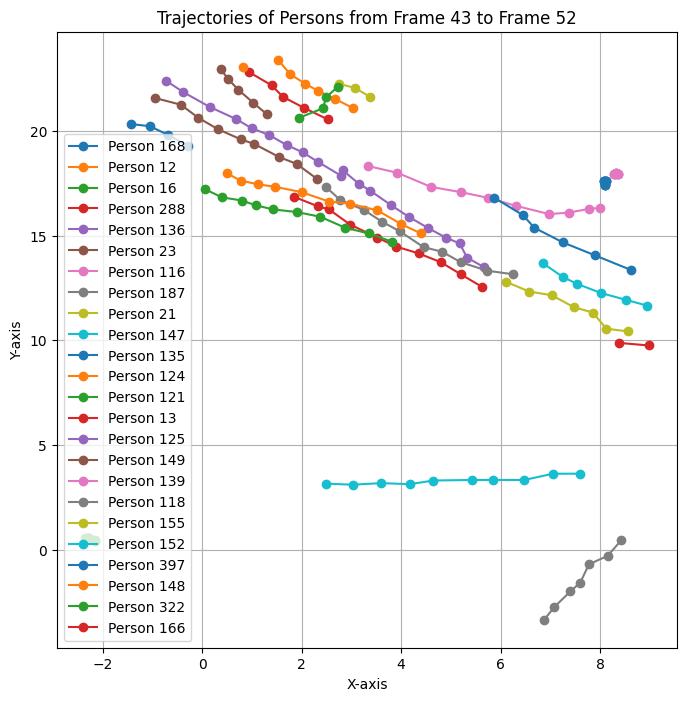

In [ ]:
import matplotlib.pyplot as plt
import json
import ipywidgets as widgets
from IPython.display import display
import numpy as np

# Function to convert positionID into (X, Y) coordinates
def convert_position_id(positionID):
    X = -3.0 + 0.025 * (positionID % 480)
    Y = -9.0 + 0.025 * (positionID // 480)
    return X, Y

# Function to load data and get person positions
def get_positions(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    # Return a list of tuples (personID, X, Y)
    return [(person['personID'], *convert_position_id(person['positionID'])) for person in data]

# Function to plot the trajectory for each data point across 10 frames
def plot_trajectories(file_paths, start_idx):
    # Dictionary to store trajectories for each personID
    trajectories = {}

    # Collect data for the next 10 frames starting from start_idx
    for i in range(start_idx, min(start_idx + 10, len(file_paths))):
        file_path = file_paths[i]
        positions = get_positions(file_path)

        # Store positions in the trajectories dictionary
        for personID, x, y in positions:
            if personID not in trajectories:
                trajectories[personID] = {'x': [], 'y': []}
            trajectories[personID]['x'].append(x)
            trajectories[personID]['y'].append(y)

    plt.figure(figsize=(8, 8))

    # Plot the trajectories for each personID
    for personID, trajectory in trajectories.items():
        plt.plot(trajectory['x'], trajectory['y'], label=f'Person {personID}', marker='o')

    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title(f'Trajectories of Persons from Frame {start_idx} to Frame {start_idx + 9}')
    plt.grid(True)
    plt.legend()
    plt.show()

# List of file paths
file_paths = file_list  # Replace with your actual file paths

# Creating a slider widget (to select the starting frame)
slider = widgets.IntSlider(value=0, min=0, max=len(file_paths)-10, step=1, description='Start Frame')

# Function to update plot when the slider value changes
def update_plot(start_idx):
    plt.close()  # Close the previous plot
    plot_trajectories(file_paths, start_idx)

# Linking the slider to the update_plot function
widgets.interact(update_plot, start_idx=slider)

# Display the slider
display(slider)


In [ ]:
type(data)

list

In [ ]:
len(data)

38

In [ ]:
len(file_list)

400

In [ ]:
file_list[:5]

['/content/annotations_positions/annotations_positions/00000000.json',
 '/content/annotations_positions/annotations_positions/00000005.json',
 '/content/annotations_positions/annotations_positions/00000010.json',
 '/content/annotations_positions/annotations_positions/00000015.json',
 '/content/annotations_positions/annotations_positions/00000020.json']

In [ ]:
xt = get_positions(file_list[0])

In [ ]:
xt[0][1:]

(5.65, 14.775000000000002)

## Image to Cluster to Projections


In [1]:
import torch
from PIL import Image, ImageDraw
import os

# Load the YOLOv5 model (small version)
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Paths to the images
image_paths = [
    "/content/00000000 1.png",
    "/content/00000000 2.png",
    "/content/00000000 3.png",
    "/content/00000000 4.png",
    "/content/00000000 5.png",
    "/content/00000000 6.png",
    "/content/00000000 7.png",
]

# Folder to save the output images
output_folder = "/content/detected_images/"
os.makedirs(output_folder, exist_ok=True)  # Create the folder if it doesn't exist

# Run the model on each image, filter for people, and save the results
for path in image_paths:
    img = Image.open(path)

    # Run inference
    result = model(img)

    # Filter the results to keep only detections of the "person" class (class index 0)
    person_results = result.pred[0][result.pred[0][:, -1] == 0]

    # Draw bounding boxes for the "person" class
    draw = ImageDraw.Draw(img)
    for *box, conf, cls in person_results:
        x1, y1, x2, y2 = map(int, box)  # Convert to integers for drawing
        draw.rectangle([x1, y1, x2, y2], outline="red", width=3)
        draw.text((x1, y1), f'Person {conf:.2f}', fill="red")

    # Save the image with bounding boxes to the output folder
    output_path = os.path.join(output_folder, os.path.basename(path))
    img.save(output_path)

print(f"Results saved to {output_folder}")


/usr/local/lib/python3.10/dist-packages/torch/hub.py:295: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
requirements: Ultralytics requirement ['gitpython>=3.1.30'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 121.4 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 4.7s, installed 1 package: ['gitpython>=3.1.30']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



YOLOv5 🚀 2024-10-18 Python-3.10.12 torch-2.4.1+cu121 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 135MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp

Results saved to /content/detected_images/


In [48]:
# !rm -r detected_images/
# !rm -r /content/midpoints_jsons

### Midpoint Retreival

Saving the midpoint of the bottom of the boudning box as a singlepoint for calculating projection

In [2]:
import torch
from PIL import Image
import os
import json

# Load the YOLOv5 model (small version)
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Paths to the images
image_paths = [
    "/content/00000000 1.png",
    "/content/00000000 2.png",
    "/content/00000000 3.png",
    "/content/00000000 4.png",
    "/content/00000000 5.png",
    "/content/00000000 6.png",
    "/content/00000000 7.png",
]

# Directory to save the JSON files with midpoints
output_dir = "/content/midpoints"
os.makedirs(output_dir, exist_ok=True)

# Run the model on each image and save only person midpoints as JSON
for path in image_paths:
    img = Image.open(path)

    # Run inference
    result = model(img)

    # Filter the results to keep only detections of the "person" class (class index 0)
    person_results = result.pred[0][result.pred[0][:, -1] == 0]

    # Convert tensor to numpy for easier processing
    person_results = person_results.cpu().numpy()

    # Create a list to hold midpoints of bottom rows of bounding boxes
    midpoints = []
    for *box, conf, cls in person_results:
        # Calculate the midpoint of the bottom row of the bounding box
        x1, y1, x2, y2 = box
        midpoint_x = (x1 + x2) / 2  # Midpoint between x1 and x2
        midpoint_y = y2             # The y-coordinate of the bottom row (y2)

        # Store the midpoint and confidence score
        midpoint = {
            "midpoint": {
                "x": float(midpoint_x),
                "y": float(midpoint_y)
            },
            "confidence": float(conf)
        }
        midpoints.append(midpoint)

    # Prepare the output JSON filename
    image_name = os.path.basename(path)
    json_filename = os.path.splitext(image_name)[0] + "_midpoints.json"
    json_path = os.path.join(output_dir, json_filename)

    # Write the midpoints to a JSON file
    with open(json_path, "w") as f:
        json.dump(midpoints, f, indent=4)

    print(f"Saved person midpoints to {json_path}")


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-10-18 Python-3.10.12 torch-2.4.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved person midpoints to /content/midpoints/00000000 1_midpoints.json


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved person midpoints to /content/midpoints/00000000 2_midpoints.json


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved person midpoints to /content/midpoints/00000000 3_midpoints.json


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved person midpoints to /content/midpoints/00000000 4_midpoints.json


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved person midpoints to /content/midpoints/00000000 5_midpoints.json


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved person midpoints to /content/midpoints/00000000 6_midpoints.json


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved person midpoints to /content/midpoints/00000000 7_midpoints.json


In [6]:
!zip -r /content/midpoints.zip /content/midpoints

  adding: content/midpoints/ (stored 0%)
  adding: content/midpoints/00000000 3_midpoints.json (deflated 78%)
  adding: content/midpoints/00000000 7_midpoints.json (deflated 77%)
  adding: content/midpoints/00000000 1_midpoints.json (deflated 78%)
  adding: content/midpoints/00000000 5_midpoints.json (deflated 78%)
  adding: content/midpoints/00000000 2_midpoints.json (deflated 77%)
  adding: content/midpoints/00000000 6_midpoints.json (deflated 78%)
  adding: content/midpoints/00000000 4_midpoints.json (deflated 78%)


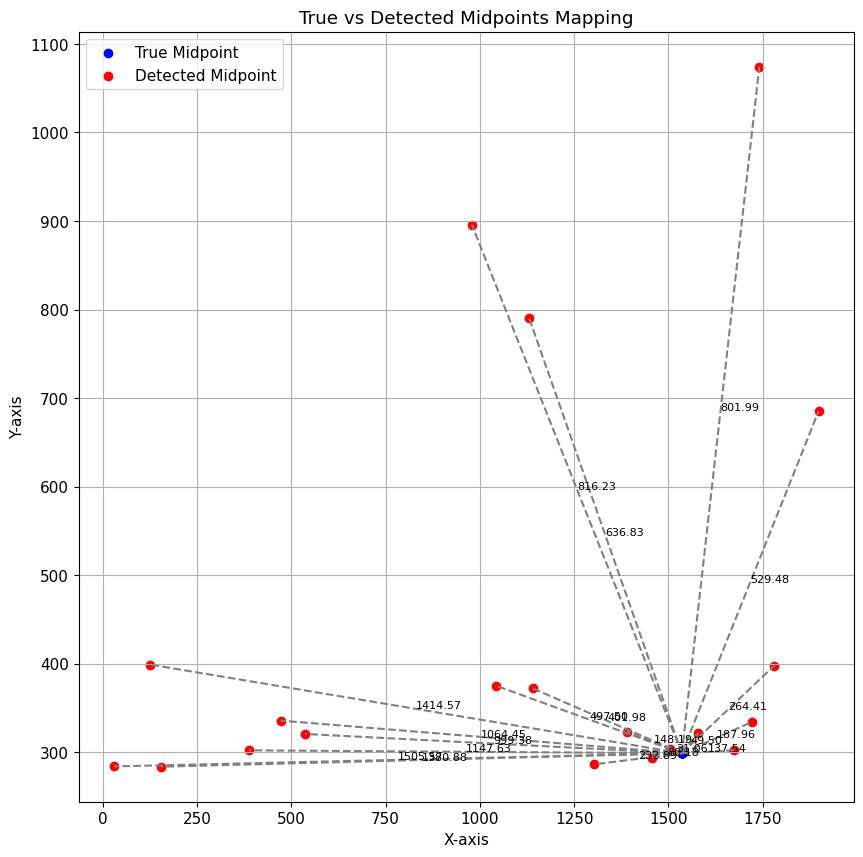

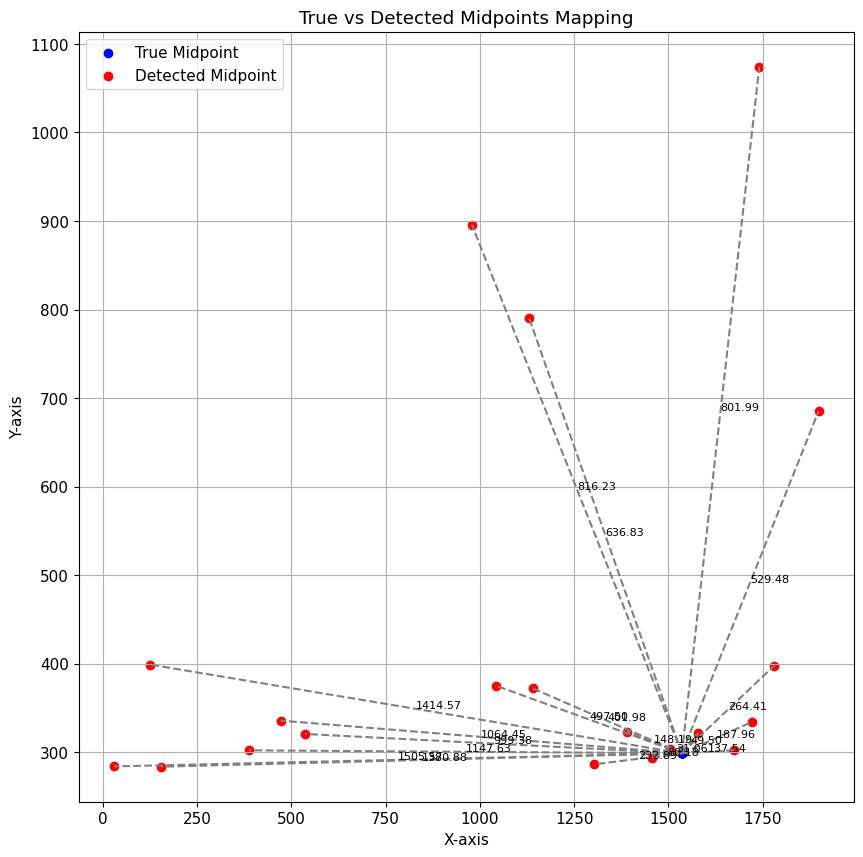

In [8]:
import os
import json
import matplotlib.pyplot as plt
%matplotlib inline

# Function to calculate the Euclidean distance
def calculate_distance(point1, point2):
    return ((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2) ** 0.5

# Function to visualize mappings
def visualize_mappings(mapped_results, image_title="Mapped Midpoints"):
    plt.figure(figsize=(10, 10))

    for result in mapped_results:
        true_mid = result['true_midpoint']
        detected_mid = result['detected_midpoint']
        distance = result['distance']

        plt.scatter(true_mid[0], true_mid[1], color='blue', label="True Midpoint" if result == mapped_results[0] else "")
        plt.scatter(detected_mid[0], detected_mid[1], color='red', label="Detected Midpoint" if result == mapped_results[0] else "")
        plt.plot([true_mid[0], detected_mid[0]], [true_mid[1], detected_mid[1]], color='gray', linestyle='--')
        plt.text((true_mid[0] + detected_mid[0]) / 2, (true_mid[1] + detected_mid[1]) / 2, f'{distance:.2f}', fontsize=8)

    plt.title(image_title)
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.legend()
    plt.grid(True)
    plt.show()

# Paths for midpoints and the true points JSON
midpoints_path = "/content/midpoints"
true_points_path = "/content/00000000.json"

# Load true points from 00000000.json
with open(true_points_path, 'r') as f:
    true_points_data = json.load(f)

# Load all midpoints files from the midpoints directory
midpoints_files = [os.path.join(midpoints_path, f) for f in os.listdir(midpoints_path) if f.endswith('.json')]

# Load all midpoints into a dictionary
midpoints_data = {}
for file_path in midpoints_files:
    image_name = os.path.basename(file_path).replace('_midpoints.json', '')
    with open(file_path, 'r') as f:
        midpoints_data[image_name] = json.load(f)

# Map midpoints to true points
mapped_results = []
for person in true_points_data:
    for view in person['views']:
        if view['xmin'] != -1:
            true_midpoint = ((view['xmin'] + view['xmax']) / 2, view['ymax'])
            corresponding_image = f"00000000 {view['viewNum'] + 1}"
            if corresponding_image in midpoints_data:
                detected_midpoints = midpoints_data[corresponding_image]
                for detected in detected_midpoints:
                    detected_midpoint = (detected['midpoint']['x'], detected['midpoint']['y'])
                    distance = calculate_distance(true_midpoint, detected_midpoint)
                    mapped_results.append({
                        'personID': person['personID'],
                        'viewNum': view['viewNum'],
                        'true_midpoint': true_midpoint,
                        'detected_midpoint': detected_midpoint,
                        'distance': distance,
                        'confidence': detected['confidence']
                    })

# Visualize the mappings
visualize_mappings(mapped_results[:20], image_title="True vs Detected Midpoints Mapping")
